In [702]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
import warnings

# Practice Skills
* Creative feature engineering 
* Advanced regression techniques like random forest and gradient boosting

In [799]:
df_train=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [800]:
pd.options.display.max_columns = None

# Exploratory Data Analysis(EDA)

In [801]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [802]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

* Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

* Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [803]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [804]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [805]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
#df_test.drop("Id", axis = 1, inplace = True)


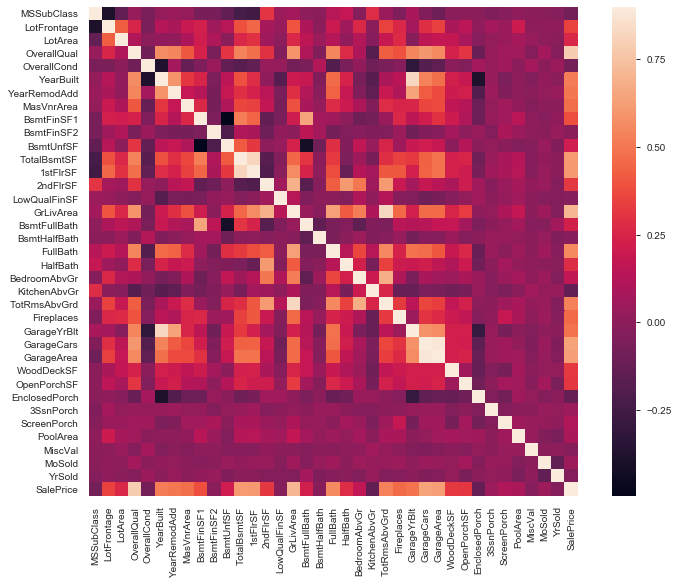

In [337]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [806]:
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))



The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 80) 


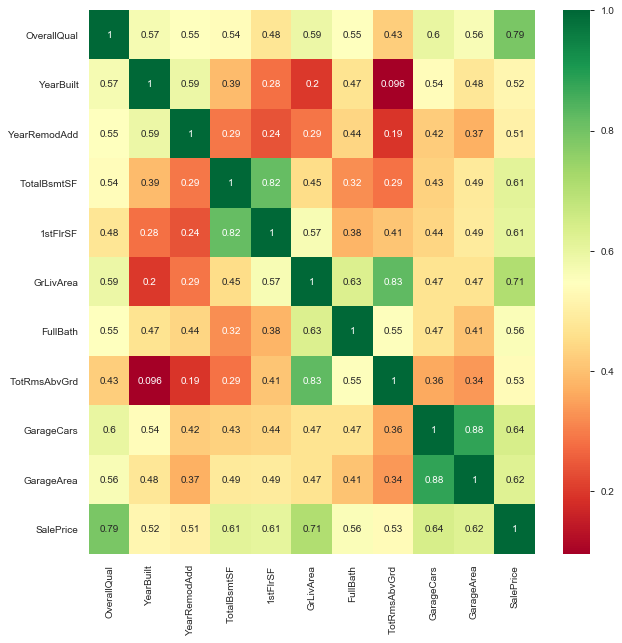

In [765]:
 #most correlated features
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

most of the features are correlated with each other like Garage Cars and Garage Area

OverallQual is highly correlated with target feature SalePrice 0.79 can you see. 

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


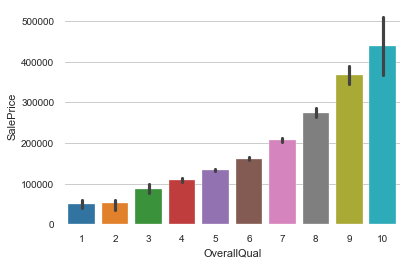

In [584]:
sns.barplot(df_train.OverallQual,df_train.SalePrice)

here we can see how OverallQual is corelated

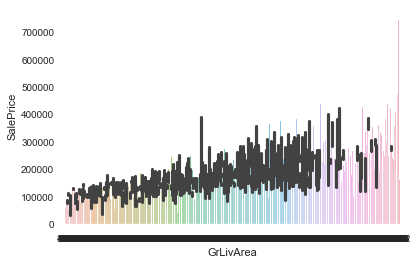

In [14]:
sns.barplot(df_train.GrLivArea,df_train.SalePrice)

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


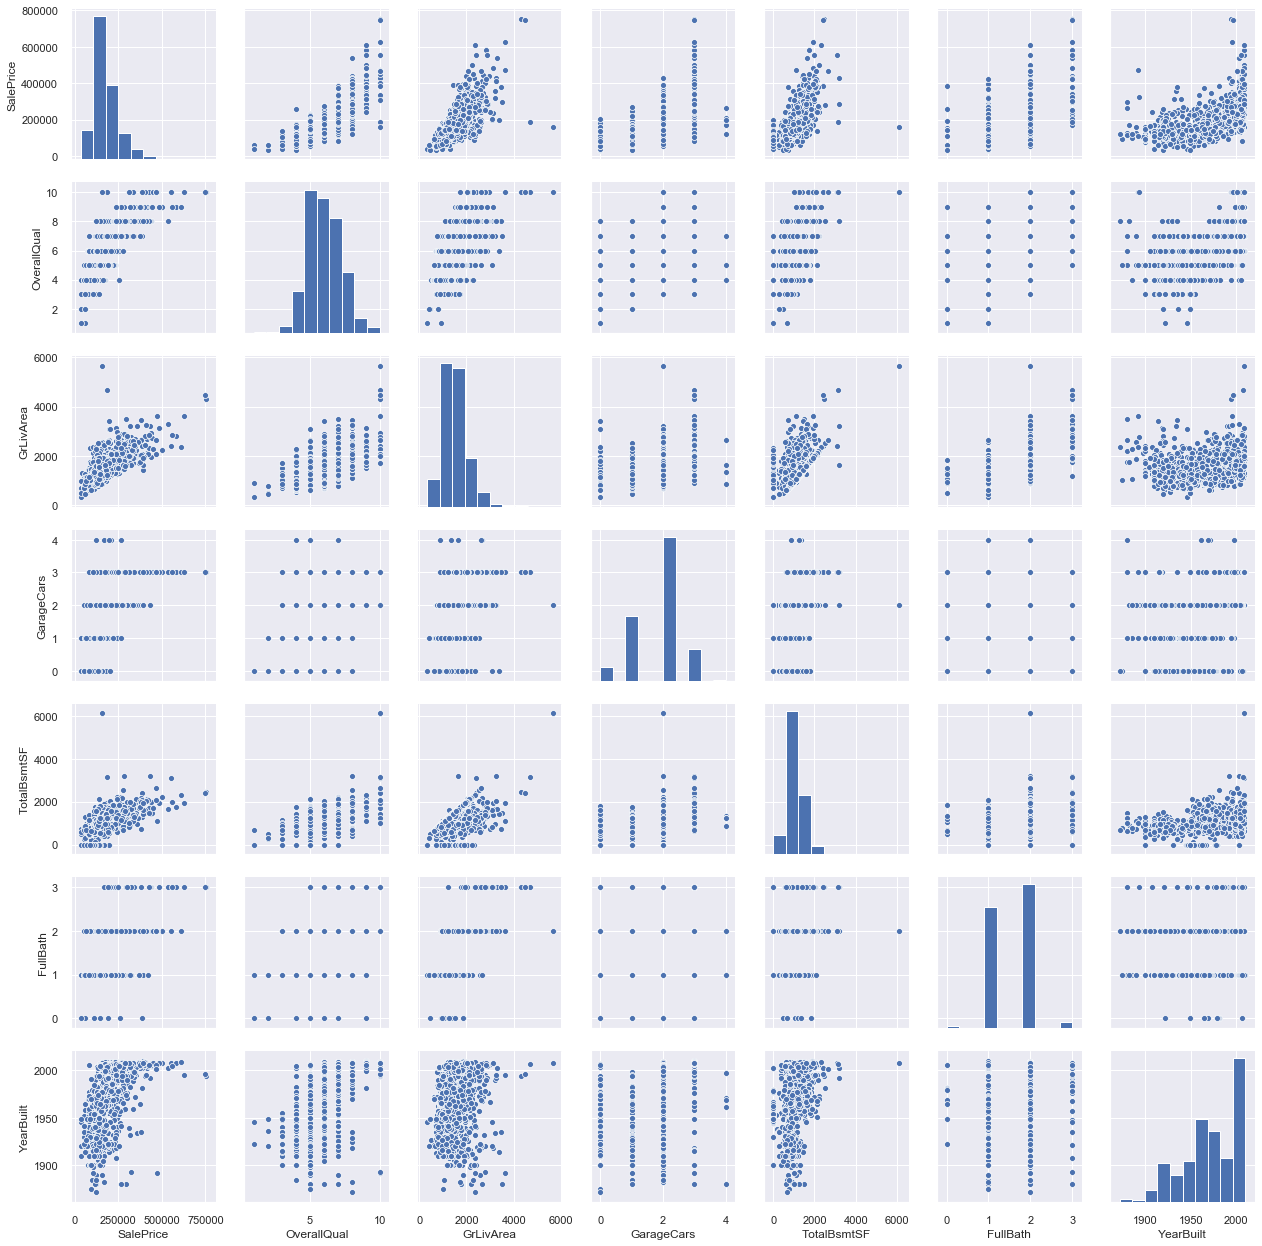

In [15]:
sns.set()
cols = [ 'SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

    #plt.show()
sns.pairplot(df_train[cols], size = 2.5)
plt.show();


 mu = 180921.20 and sigma = 79415.29

skewness of salesprice is : 1.8828757597682129


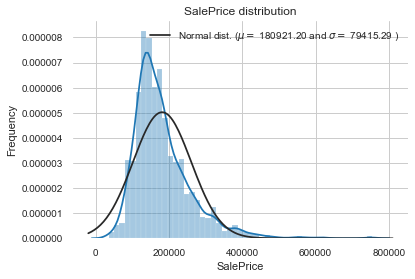

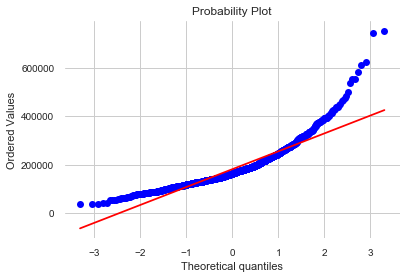

In [808]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
print("skewness of salesprice is :", df_train["SalePrice"].skew())
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [714]:
df_train.SalePrice = np.log1p(df_train.SalePrice )
y = df_train.SalePrice
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

skewness of salesprice is : 1.8828757597682129


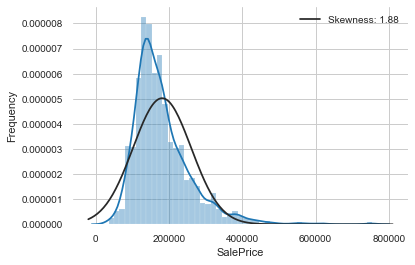

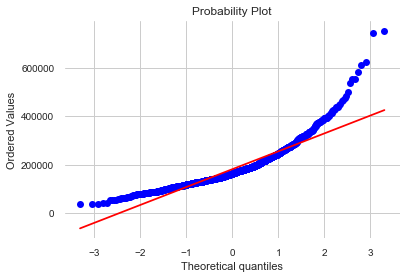

In [810]:
print("skewness of salesprice is :", df_train["SalePrice"].skew())
#train['SalePrice'] = np.log(train['SalePrice']+1)
sns.distplot(df_train['SalePrice'],fit=norm)
(mu, sig) = norm.fit(df_train['SalePrice'])
plt.ylabel('Frequency')
plt.legend(["Skewness: {:.2f}".format(df_train['SalePrice'].skew())])
plt.show()
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

# Data Preprocessing and Data Cleaning

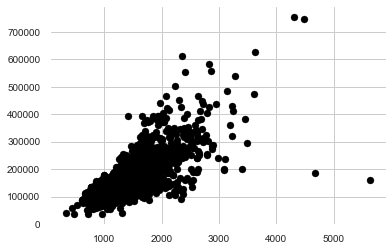

In [768]:
plt.scatter(y =df_train.SalePrice,x = df_train.GrLivArea,c = 'black')
plt.show()
#we can see the outlier in the below image

In [811]:
train_nas = df_train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [812]:
test_nas = df_test.isnull().sum()
test_nas = test_nas[test_nas>0]
test_nas.sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [813]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    

In [814]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [815]:
#numerical data
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [816]:
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
#FOR NUMERIC
train_num = df_train[numerical_features]
#FOR CATEGORICAL
train_cat = df_train[categorical_features]

Numerical features : 37
Categorical features : 43


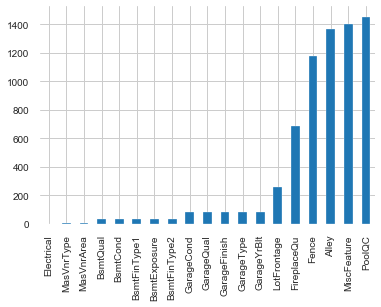

In [817]:
sns.set_style("whitegrid")
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [818]:
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [819]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


In [820]:
# Handle remaining missing values for catergorical features by using median as replacement
print("NAs for catergorical features in train : " + str(train_cat.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for catergorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for catergorical features in train : 6617
Remaining NAs for catergorical features in train : 6617


* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
* GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
* Functional : data description says NA means typical
* Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
* KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
* Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
* SaleType : Fill in again with most frequent which is "WD"
* MSSubClass : Na most likely means No building class. We can replace missing values with None


In [821]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
    
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)
    
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :
#missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)
    
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
#For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
    
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses.
#We can fill 0 for the area and None for the type.
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

#MSZoning (The general zoning classification) : 'RL' is by far the most common value. 
#So we can fill in missing values with 'RL'
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. 
#We can then safely remove it.
df_train = df_train.drop(['Utilities'], axis=1)

#Functional : data description says NA means typical
df_train["Functional"] = df_train["Functional"].fillna("Typ")

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

#KitchenQual: Only one NA value, and same as Electrical,
#we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value.
#We will just substitute in the most common string
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

#SaleType : Fill in again with most frequent which is "WD"
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

#MSSubClass : Na most likely means No building class. We can replace missing values with None
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

df_train["PoolQC"] = df_train["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"

df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
df_train["Alley"] = df_train["Alley"].fillna("None")
#Fence : data description says NA means "no fence"

df_train["Fence"] = df_train["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")


In [822]:
# Some numerical features are actually really categories
df_train = df_train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [823]:
 #Encode some categorical features as ordered numbers when there is information in the order
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [824]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]

Numerical features : 43
Categorical features : 35


In [825]:
df_test.drop(['Alley','MiscFeature','Fence','PoolQC'], axis=1, inplace=True)

In [826]:
df_test["LotFrontage"].fillna(df_test['LotFrontage'].mean(), inplace=True)
df_test["MasVnrType"]=df_test["MasVnrType"]=df_test["MasVnrType"].replace(np.nan, "unknown")
df_test["Utilities"]=df_test["Utilities"].replace(np.nan, "unknown")
df_test["Exterior1st"]=df_test["Exterior1st"].replace(np.nan, "unknown")
df_test["Exterior2nd"]=df_test["Exterior2nd"].replace(np.nan, 'unknown')
df_test["MasVnrArea"].fillna(df_test['MasVnrArea'].mean(), inplace=True) 
df_test['BsmtQual']=df_test["BsmtQual"].replace(np.nan, 'unknown')
df_test["BsmtFullBath"].fillna(df_test["BsmtFullBath"].mean(), inplace=True)
df_test["KitchenQual"]=df_test["KitchenQual"].replace(np.nan, 'unknown')
df_test["Functional"]=df_test["Functional"].replace(np.nan, 'unknown')
df_test["FireplaceQu"]= df_test["FireplaceQu"].replace(np.nan, 'unknown')
df_test["GarageType"]=df_test['GarageType'].replace(np.nan, 'unknown')
df_test["GarageYrBlt"].fillna(df_test['GarageYrBlt'].mean(), inplace=True)
df_test["GarageFinish"]=df_test['GarageFinish'].replace(np.nan, 'unknown')
df_test["GarageCars"].fillna(df_test['GarageCars'].mean(), inplace=True)
df_test["GarageArea"].fillna(df_test['GarageArea'].mean(), inplace=True)
df_test["GarageQual"]=df_test["GarageQual"].replace(np.nan, 'unknown')
df_test["GarageCond"]=df_test["GarageCond"].replace(np.nan, 'unknown')
df_test["SaleType"]=df_test["SaleType"].replace(np.nan, 'unknown')
df_test["BsmtFinType1"]=df_test["BsmtFinType1"].replace(np.nan, "unknown")
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].replace(np.nan, "unknown")
df_test["BsmtExposure"]=df_test["BsmtExposure"].replace(np.nan, "unknown")
df_test["MSZoning"]=df_test["MSZoning"].replace(np.nan, "unknown")
df_test["BsmtFinSF1"].fillna(df_test['BsmtFinSF1'].mean(), inplace=True)
df_test["BsmtFinSF2"].fillna(df_test['BsmtFinSF2'].mean(), inplace=True)
df_test["BsmtUnfSF"].fillna(df_test['BsmtUnfSF'].mean(), inplace=True)
df_test["TotalBsmtSF"].fillna(df_test['TotalBsmtSF'].mean(), inplace=True)
df_test["BsmtHalfBath"].fillna(df_test['BsmtHalfBath'].mean(), inplace=True)
df_test["BsmtCond"]=df_test["BsmtCond"].replace(np.nan, "unknown")

In [827]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

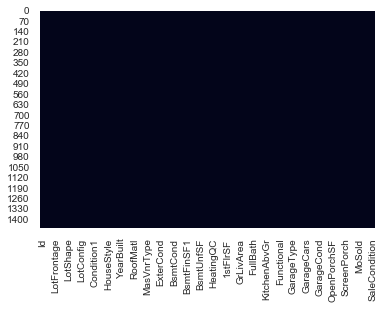

In [828]:
sns.heatmap(df_test.isnull(), cbar=False)

In [829]:
#for train set
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [830]:
#for test set
all_data_na = (df_test.isnull().sum() / len(df_test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [831]:
df_train.isnull().sum().sort_values(ascending = False)

SalePrice      0
BsmtQual       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
              ..
Functional     0
Fireplaces     0
FireplaceQu    0
GarageType     0
MSSubClass     0
Length: 79, dtype: int64

In [832]:
 #Create dummy features for categorical values via one-hot encoding
train_cat.shape

(1460, 35)

In [833]:
train_cat.head()
#HERE IS THE VALUES

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,4,3,0,6,1,GasA,Y,SBrkr,None,Attchd,RFn,3,3,None,None,None,Feb,WD,Normal
1,SC20,RL,None,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,4,3,3,5,1,GasA,Y,SBrkr,3,Attchd,RFn,3,3,None,None,None,May,WD,Normal
2,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,4,3,1,6,1,GasA,Y,SBrkr,3,Attchd,RFn,3,3,None,None,None,Sep,WD,Normal
3,SC70,RL,None,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,3,4,0,5,1,GasA,Y,SBrkr,4,Detchd,Unf,3,3,None,None,None,Feb,WD,Abnorml
4,SC60,RL,None,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,4,3,2,6,1,GasA,Y,SBrkr,3,Attchd,RFn,3,3,None,None,None,Dec,WD,Normal


In [834]:
train_num.head()


,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450,2,4,3,7,5,2003,2003,196.0,4,3,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,2003.0,2,548,2,0,61,0,0,0,0,0,2008
1,80.0,9600,2,4,3,6,8,1976,1976,0.0,3,3,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,1976.0,2,460,2,298,0,0,0,0,0,0,2007
2,68.0,11250,2,3,3,7,5,2001,2002,162.0,4,3,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,2001.0,2,608,2,0,42,0,0,0,0,0,2008
3,60.0,9550,2,3,3,7,5,1915,1970,0.0,3,3,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,1998.0,3,642,2,0,35,272,0,0,0,0,2006
4,84.0,14260,2,3,3,8,5,2000,2000,350.0,4,3,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,2000.0,3,836,2,192,84,0,0,0,0,0,2008


In [835]:
str(train_cat.isnull().values.sum())

'0'

# TIME FOR MODELING

earlier we split the train set into categorical and numerical features.

Now after transformation(preprocessing) we'll join them to get the whole train set back.

In [836]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor  
from sklearn.metrics import mean_squared_error

In [837]:
df_train = pd.concat([train_cat,train_num],axis=1)
df_train.shape

(1460, 78)

In [838]:
df_train.tail()

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
1455,SC60,RL,None,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,4,3,0,1,1,GasA,Y,SBrkr,3,Attchd,RFn,3,3,None,None,None,Aug,WD,Normal,62.0,7917,2,4,3,6,5,1999,2000,0.0,3,3,0,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,1999.0,2,460,2,0,40,0,0,0,0,0,2007
1456,SC20,RL,None,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,4,3,0,5,3,GasA,Y,SBrkr,3,Attchd,Unf,3,3,None,MnPrv,None,Feb,WD,Normal,85.0,13175,2,4,3,6,6,1978,1988,119.0,3,3,790,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,7,2,1978.0,2,500,2,349,0,0,0,0,0,0,2010
1457,SC70,RL,None,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,3,4,0,6,1,GasA,Y,SBrkr,4,Attchd,RFn,3,3,None,GdPrv,Shed,May,WD,Normal,66.0,9042,2,4,3,7,9,1941,2006,0.0,5,4,275,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,1941.0,1,252,2,0,60,0,0,0,0,2500,2010
1458,SC20,RL,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,3,3,1,6,3,GasA,Y,FuseA,None,Attchd,Unf,3,3,None,None,None,Apr,WD,Normal,68.0,9717,2,4,3,5,6,1950,1996,0.0,3,3,49,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,8,0,1950.0,1,240,2,366,0,112,0,0,0,0,2010
1459,SC20,RL,None,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,3,3,0,4,2,GasA,Y,SBrkr,None,Attchd,Fin,3,3,None,None,None,Jun,WD,Normal,75.0,9937,2,4,3,5,6,1965,1965,0.0,4,3,830,290,136,1256,4,1256,0,0,1256,1,0,1,1,3,1,3,6,8,0,1965.0,1,276,2,736,68,0,0,0,0,0,2008


In [839]:
 ## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((df_train, df_test)).reset_index(drop = True)
#all_data.drop(['SalePrice'], axis = 1, inplace = True)
#y = df_train['SalePrice'].reset_index(drop=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [840]:
all_data= all_data.drop(['Street', 'PoolQC',], axis=1)
all_data.shape

(2919, 78)

In [882]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2919, 440)

In [881]:
#filling NA's with the mean of the column:
final_features = final_features.fillna(final_features.mean())


In [908]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):]

In [909]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [910]:
X.shape

(2914, 440)

In [911]:
X.values.reshape(-1,1)
X=X.transpose()

In [912]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)


In [913]:
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [440, 1425]

In [849]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((725, 440), (725,), (725, 440), (725,))

In [850]:
y_train.values.reshape((-1,1))
y_test.values.reshape((-1,1))
y_train=y_train.transpose()
y_test=y_test.transpose()

In [851]:
y_train.shape, y_test.shape

((725,), (725,))

In [852]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [853]:
y_pred

array([ 3.27155712e+08,  3.01151027e+09,  3.01151027e+09,  1.66933299e+09,
        3.01151027e+09,  2.47463936e+09,  3.54838118e+09,  8.64026624e+08,
        2.47463936e+09,  2.74307482e+09,  1.40089754e+09,  1.93776845e+09,
        3.01151027e+09,  3.01151027e+09,  3.01151027e+09,  3.54838118e+09,
        1.93776845e+09,  2.47463936e+09,  2.20620390e+09,  1.93776845e+09,
        2.47463936e+09,  2.47463936e+09,  1.40089754e+09,  2.47463936e+09,
        2.47463936e+09,  1.40089754e+09,  2.47463936e+09,  1.40089754e+09,
        2.47463936e+09,  2.47463936e+09,  1.40089754e+09,  8.64026624e+08,
        3.01151027e+09,  1.93776845e+09,  2.74307482e+09,  3.01151027e+09,
        2.47463936e+09,  3.54838118e+09,  3.01151027e+09,  3.54838118e+09,
        2.20620390e+09,  2.47463936e+09,  2.74307482e+09,  2.74307482e+09,
        2.47463936e+09,  2.47463936e+09,  3.01151027e+09,  1.13246208e+09,
        2.47463936e+09,  3.01151027e+09,  8.64026624e+08,  3.54838118e+09,
        3.01151027e+09,  

In [860]:
# get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

136263159900398739319806726987585957143848197214437376.00


In [855]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=8)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [856]:
print ('%.8f'%scores.mean())

-188992728071.32220459


In [859]:
num_folds = 10 
seed = 8
scoring = 'neg_mean_squared_error'
t = []
t.append(('LR', LinearRegression()))
t.append(('LASSO', Lasso()))
t.append(('EN', ElasticNet()))
t.append(('KNN', KNeighborsRegressor()))
t.append(('CART', DecisionTreeRegressor())) 
t.append(('SVR', SVR()))



results = []
names = []
for name, model in t: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    print(name, cv_results.mean(), cv_results.std()) 

LR -4.88370111825706e+22 4.914120979757809e+22
LASSO -0.1624028183056366 0.03720970072198361
EN -0.1624028183056366 0.03720970072198361
KNN -0.19679649094175009 0.033038269327174914
CART -0.34756857859713614 0.06086474744984932


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

SVR -0.1903572354002953 0.03826441341661489


In [861]:
import xgboost as xgb


In [862]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

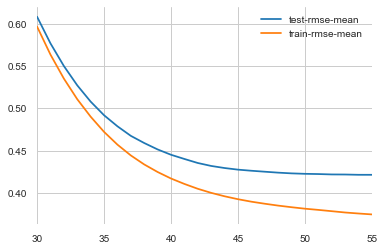

In [863]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

# L1 Regularisation (Lasso)(Least Absolute Shrinkage and Selection Operator)


* Having a large number of samples (n) with respect to the number of dimensionality (d) increases the quality of our model.
* One way to reduce the eﬀective number of dimensions is to use those that most contribute to the signal and ignore those that mostly act as noise.
* L1 regularization achieves this by adding a penalty that results in the weight for the dimensions that act as noise becoming 0. 
* L1 regularisation encourages a sparse vector of weights in which few are non-zero and many are zero. 


In [864]:
#from sklearn.ensemble import Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True) 
lasso.fit(X_train, y_train) 
lasso_pred = lasso.predict(X_test) 

In [865]:
print(mean_squared_error(y_test,lasso_pred ))

0.15390433071326812


In [866]:
 lasso.score(X_test, y_test) 

-0.0004956966667490903

# L2 Regularisation (Ridge)

* Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our least-squares cost function:



* By increasing the value of the hyperparameter λ , we increase the regularization strength and shrink the weights of our model.


In [867]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True) 
ridge.fit(X_train, y_train) 
ridge_pred = ridge.predict(X_test)
print(mean_squared_error(y_test,ridge_pred ))
ridge.score(X_test, y_test) 


30.956412282230147


-200.24032331692456

In [868]:
from sklearn.ensemble import RandomForestRegressor
my_model = RandomForestRegressor()
my_model.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [869]:
random_predicted_prices = my_model.predict(X_test)
print(mean_squared_error(y_test,random_predicted_prices ))

0.18002168321303622


In [870]:
print(predicted_prices)

[12.03122736 11.78205193 12.21218897 12.21039573 11.81453179 12.27961973
 12.50762862 12.7988534  12.54793886 12.20539536 12.51297275 12.28047552
 12.05894289 11.95382905 12.60802995 12.512488   11.8075349  12.56163878
 11.52080478 11.65128661 12.49130607 11.96193982 11.90448631 12.28906286
 11.86257934 12.15120437 12.41510273 12.01765259 11.76536705 11.98121992
 12.89416086 12.32915718 11.895799   12.17640356 11.5084453  12.55115644
 12.56770068 11.97321603 11.75407808 12.86952598 11.97845931 12.01590342
 12.47273494 11.85309487 11.58468732 11.84805335 11.61939632 12.57539277
 11.58534987 11.68730832 11.8224286  12.22708886 11.84205398 11.65785762
 11.68660819 12.81371409 12.06217731 11.74396678 12.53640371 11.48426593
 12.68366215 12.13552188 12.06366996 11.93158567 11.74421768 12.2494422
 12.04423673 11.88235097 11.87122317 11.88550847 12.15136856 11.94399873
 12.89383525 11.81209104 11.72694929 12.3085172  11.83973336 11.61525487
 12.21183582 11.90681895 11.63172942 12.40558184 11.

In [871]:
from sklearn.ensemble import GradientBoostingRegressor
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=8, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [872]:
rescaledValidationX = scaler.transform(X_test)
gradient_predictions = model.predict(X_test) 
print(mean_squared_error(y_test, gradient_predictions))

0.19864547596656384


In [873]:
print(gradient_predictions)

[11.91188397 12.13394656 12.12331103 12.14798179 12.00448331 11.99990458
 11.87459882 12.07538228 12.0100265  11.85679767 12.42815269 12.12351847
 11.79186847 11.88662381 12.30988293 12.14426985 12.0174782  11.75522808
 12.06138203 11.97660886 12.15987504 12.09360861 11.63811806 11.91481018
 11.8431817  11.74298411 12.07850606 12.05653671 12.47595241 11.33483183
 12.38227936 12.1296473  12.20332426 11.82698847 11.7838539  11.92030444
 11.84039486 12.06304323 12.13658574 12.11799805 11.54416997 11.85020375
 11.91949307 12.0751289  12.04700441 12.02736654 12.00034314 11.90940299
 12.11483283 12.10128259 11.94485888 11.98984692 11.91066834 11.70054172
 12.1691489  12.01286633 12.12199683 11.97710016 12.13325165 11.94744979
 11.99022511 12.01928604 11.84983808 12.1040515  12.22141126 12.29524783
 11.96327989 12.16116091 12.40623436 11.99443896 12.0788091  12.00159886
 12.00553117 12.12816862 12.14456537 12.18116255 11.29186099 12.11949853
 11.88817406 11.95788479 11.82446505 11.8947802  11

In [875]:
prediction_list=[lasso_pred,random_predicted_prices,gradient_predictions,ridge_pred]
for i in prediction_list:
    submit_test1 = pd.concat([df_test['Id'],pd.DataFrame(i)], axis=1)
    submit_test1.columns=['Id', 'SalePrice']

In [876]:
submit_test1

,Id,SalePrice
0,1461,11.944909
1,1462,12.015238
2,1463,12.019249
3,1464,12.108604
4,1465,12.011061
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [878]:
submit_test1.to_csv('submission.csv', index=False )

In [879]:
def create_download_link(title = "Download CSV file", filename = "submission.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [880]:
from IPython.display import HTML
create_download_link(filename='submission.csv')